In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [5]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

In [7]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131855,16.379533,16.126146,16.358437,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.968765,96.871931,93.603675,95.197945,26452900
2757,2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800
2758,2022-12-16,90.534698,91.421511,89.687743,90.873478,48485500


In [8]:
ma_100_days = data.Close.rolling(100).mean()


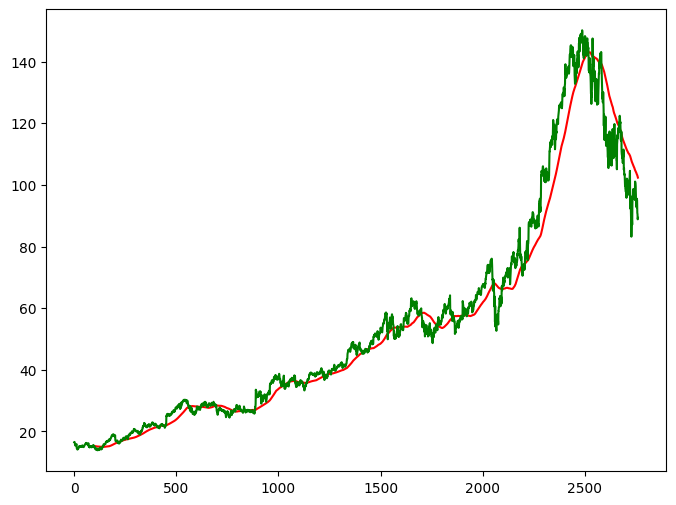

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()


In [10]:
ma_200_days = data.Close.rolling(200).mean()


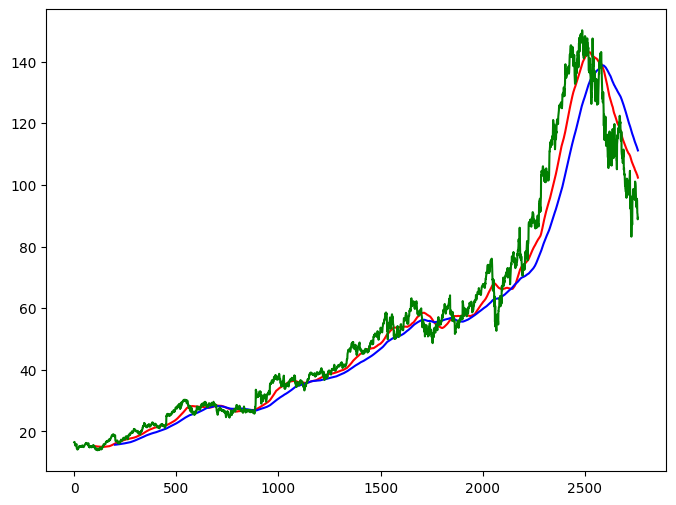

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()


In [12]:
data.dropna(inplace=True)

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0], data_test.shape[0]

(2208, 553)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [26]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [27]:
x,y = np.array(x), np.array(y)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [28]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True,))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True,))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 291ms/step - loss: 0.0600
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - loss: 0.0069
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 327ms/step - loss: 0.0061
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 319ms/step - loss: 0.0052
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 369ms/step - loss: 0.0053
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 390ms/step - loss: 0.0049
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 36s 309ms/step - loss: 0.0047
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 342ms/step - loss: 0.0043
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 327ms/step - loss: 0.0045
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 364ms/step - loss: 0.0046
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - loss: 0.0038
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 36s 293ms/step - loss: 0.0044
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 359ms/step - loss: 0.0039
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - loss: 0.0029
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [30]:
pas_100_days = data_train.tail(100)

In [33]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [45]:
data_test

Ticker,GOOG
0,70.084175
1,69.888885
2,70.268517
3,70.597328
4,70.638184
...,...
648,94.968765
649,90.873482
650,90.534698
651,88.830826


In [34]:
data_test_scale = scaler.fit_transform(data_test)

In [46]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])


In [47]:
x,y = np.array(x), np.array(y)

In [48]:
y_pred = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


In [49]:
scale = 1/scaler.scale_

In [50]:
y_pred = y_pred*scale

In [51]:
y = y*scale

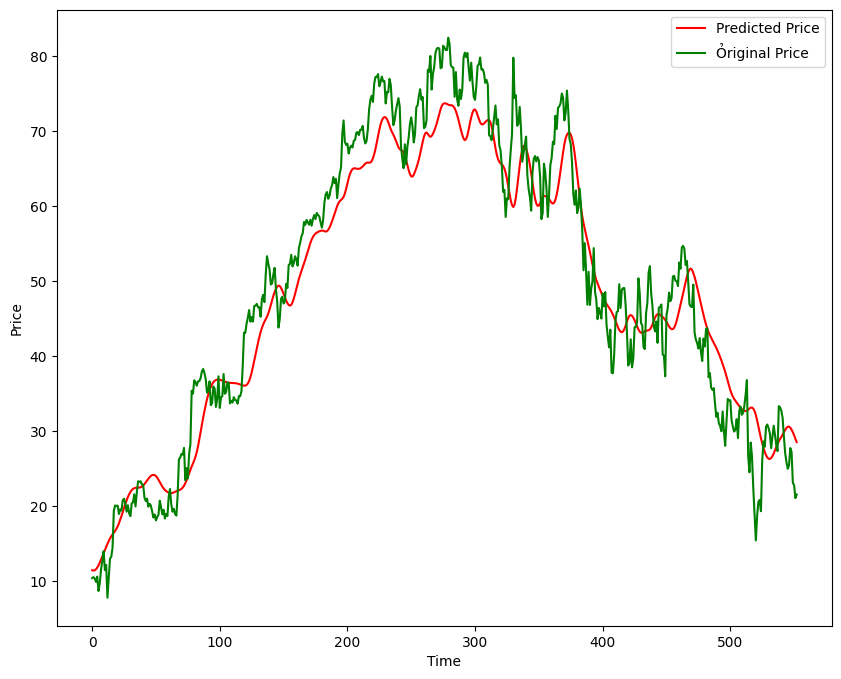

In [52]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Ỏriginal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
model.save(" Stock Predictions Model .keras")